# This notebook file is used to modify trajectories, such as cutting them and selecting the useful portions.

## Chuan Ping

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mdtraj as md
import MDAnalysis as mda

from contact_map import ContactFrequency, ContactDifference

import nglview as nv
import ipywidgets

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('bmh')

In [4]:
ns_per_frame = 0.02

eq_frame_1 = 40000
eq_frame_2 = 20000
eq_frame_3 = 10000

In [7]:
%%time
# Make sure to use the correct sequence of trajectories!!!
traj3 = md.load('/Users/cping/Desktop/ATF4/replica3/traj3_eq.h5') 
print(traj3)
print("The length of this trajectory is: " + str(ns_per_frame * traj3.n_frames) + " ns.")

<mdtraj.Trajectory with 47591 frames, 5380 atoms, 352 residues, and unitcells>
The length of this trajectory is: 951.82 ns.
CPU times: user 11.9 s, sys: 5.3 s, total: 17.2 s
Wall time: 19 s


In [3]:
show = nv.show_mdtraj(traj3)
show

NGLWidget(max_frame=47590)

In [23]:
%%time
topology3 = traj3.topology
print(topology3)

<mdtraj.Topology with 1 chains, 352 residues, 5380 atoms, 5430 bonds>
CPU times: user 183 µs, sys: 199 µs, total: 382 µs
Wall time: 322 µs


In [8]:
%%time
# Select the Alpha Carbon atom of each residue of the three replicas
ca_3      = traj3.top.select('name CA')
ca_traj_3 = traj3.atom_slice(ca_3)

CPU times: user 1.08 s, sys: 111 ms, total: 1.19 s
Wall time: 1.28 s


In [9]:
%%time
# Calculate the RMSD and Rg of three replicas
rmsd_3   = md.rmsd(ca_traj_3, ca_traj_3[0])
rg_3     = md.compute_rg(ca_traj_3)

CPU times: user 726 ms, sys: 144 ms, total: 870 ms
Wall time: 935 ms


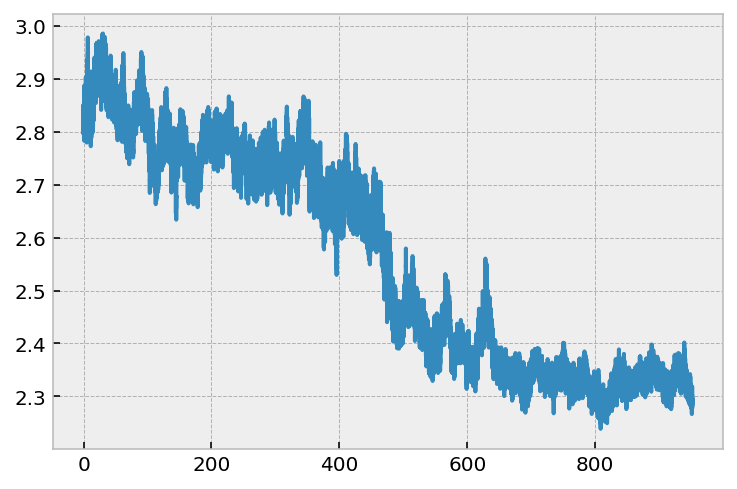

In [10]:
time_3 = 0.02*np.arange(len(rg_3))
plt.plot(time_3, rg_3)

In [3]:
%%time
traj1_eq = md.load_hdf5('/Users/cping/Desktop/ATF4/replica1/traj1_eq.h5')
print(traj1_eq)
print("The length of this trajectory is: " + str(ns_per_frame * traj1_eq.n_frames) + " ns.")

<mdtraj.Trajectory with 73690 frames, 5380 atoms, 352 residues, and unitcells>
The length of this trajectory is: 1473.8 ns.
CPU times: user 21.7 s, sys: 7.14 s, total: 28.8 s
Wall time: 55.8 s


In [4]:
%%time
traj2_eq = md.load_hdf5('/Users/cping/Desktop/ATF4/replica2/traj2_eq.h5')
print(traj2_eq)
print("The length of this trajectory is: " + str(ns_per_frame * traj2_eq.n_frames) + " ns.")

<mdtraj.Trajectory with 58098 frames, 5380 atoms, 352 residues, and unitcells>
The length of this trajectory is: 1161.96 ns.
CPU times: user 17.7 s, sys: 6.23 s, total: 24 s
Wall time: 1min 5s


In [8]:
%%time
traj3_eq = md.load_hdf5('/Users/cping/Desktop/ATF4/replica3/traj3_eq.h5')
print(traj3_eq)
print("The length of this trajectory is: " + str(ns_per_frame * traj3_eq.n_frames) + " ns.")

<mdtraj.Trajectory with 47591 frames, 5380 atoms, 352 residues, and unitcells>
The length of this trajectory is: 951.82 ns.
CPU times: user 12.9 s, sys: 6.12 s, total: 19 s
Wall time: 1min 12s


In [9]:
%%time
traj_eq_total = traj1_eq + traj2_eq + traj3_eq
# traj_output.center_coordinates(traj_output)
# This will take an ungodly amount of time, hence save this for a later step
print(traj_eq_total)
print("The length of this trajectory is: " + str(ns_per_frame * traj_eq_total.n_frames) + " ns.")

<mdtraj.Trajectory with 179379 frames, 5380 atoms, 352 residues, and unitcells>
The length of this trajectory is: 3587.58 ns.
CPU times: user 12.1 s, sys: 36.5 s, total: 48.6 s
Wall time: 33min 29s


In [10]:
show = nv.show_mdtraj(traj_eq_total)
show

NGLWidget(max_frame=179378)

In [11]:
%%time
traj_eq_total.save("traj_eq_total.h5")

CPU times: user 4min 10s, sys: 43.9 s, total: 4min 54s
Wall time: 49min 8s
